### Monte Carlo Simulation with Python

Notebook to accompany article on [Practical Business Python](https://pbpython.com/monte-carlo.html)

Update to use numpy for faster loops based on comments [here](https://www.reddit.com/r/Python/comments/arxwkm/monte_carlo_simulation_with_python/)

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
sns.set_style('whitegrid')

In [17]:
# Define the variables for the Percent to target based on historical results
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 100000

In [19]:
# Show an example of calculating the percent to target
pct_to_target = np.random.normal(
    avg,
    std_dev,
    size=(num_reps, num_simulations)
)

In [22]:
pct_to_target[0:10]

array([[0.99922447, 1.11731493, 1.05454566, ..., 0.99737651, 1.00769692,
        1.06257768],
       [0.9380497 , 1.07128811, 0.9639582 , ..., 1.07601714, 1.04110117,
        0.88368857],
       [1.09120204, 1.01157255, 1.03226858, ..., 1.01796277, 1.02586831,
        0.94779031],
       ...,
       [1.11518289, 1.00815972, 0.96872173, ..., 0.96805403, 1.12437274,
        1.01817273],
       [1.08471009, 1.02324397, 1.14852192, ..., 1.03202783, 0.96085703,
        0.97818594],
       [1.09472199, 1.07945704, 1.14147025, ..., 0.88702496, 0.83897021,
        0.91782675]])

In [23]:
# Another example for the sales target distribution
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, p=sales_target_prob, 
                                size=(num_reps, num_simulations))

In [25]:
sales_target[0:10]

array([[ 75000, 200000,  75000, ..., 300000, 100000,  75000],
       [300000, 100000, 100000, ..., 100000, 400000, 100000],
       [ 75000, 100000, 100000, ..., 100000, 100000, 200000],
       ...,
       [ 75000, 200000,  75000, ..., 200000,  75000, 400000],
       [200000, 100000, 200000, ..., 500000, 100000, 100000],
       [200000, 100000,  75000, ...,  75000, 300000, 200000]])

In [8]:
commission_percentages = np.take(
    np.array([0.02, 0.03, 0.04]),
    np.digitize(pct_to_target, bins=[.9, .99, 10])
)

In [26]:
commission_percentages[0:10]

array([[0.04, 0.03, 0.02, ..., 0.02, 0.03, 0.03],
       [0.04, 0.03, 0.03, ..., 0.03, 0.03, 0.04],
       [0.04, 0.03, 0.02, ..., 0.04, 0.04, 0.04],
       ...,
       [0.04, 0.04, 0.04, ..., 0.04, 0.03, 0.04],
       [0.03, 0.03, 0.03, ..., 0.03, 0.04, 0.04],
       [0.04, 0.03, 0.02, ..., 0.04, 0.03, 0.04]])

In [27]:
total_commissions = (commission_percentages * sales_target).sum(axis=0)

In [28]:
total_commissions.std()

96317.38360040465

In [29]:
# Show how to create the dataframe
df = pd.DataFrame(data={'Total_Commissions': total_commissions})
df.head()

,Total_Commissions
0,2741000.0
1,2680500.0
2,2903500.0
3,2730500.0
4,2686500.0


<Axes: title={'center': 'Commissions Distribution'}, ylabel='Frequency'>

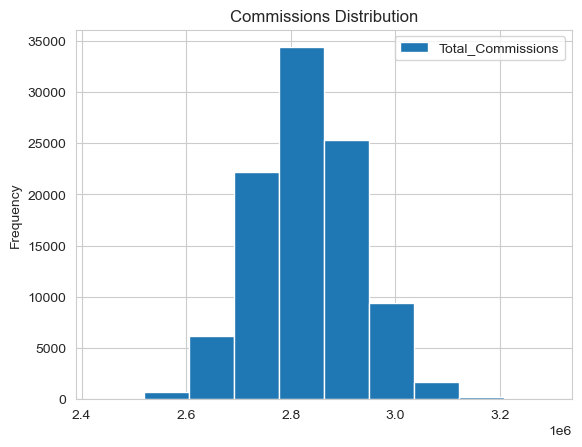

In [30]:
df.plot(kind='hist', title='Commissions Distribution')

In [31]:
df.describe()

,Total_Commissions
count,1.000000e+05
mean,2.831825e+06
std,9.631787e+04
min,2.432250e+06
25%,2.765750e+06
50%,2.830000e+06
75%,2.896500e+06
max,3.295000e+06
